In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
path_to_file ='C:/Users/etusk/Desktop/yelp_labelled.csv' #did I need to transfer txt file to csv? 
df = pd.read_csv(path_to_file)
df.head()

,Review_txt,Review_score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
keywords = ['bad', 'poor', 'terrible', 'cheap', 'slow', 'bland']
for key in keywords:
    
    df[str(key)]=df.Review_txt.str.contains(
    ' '+ str(key) + ' ',
    case=False
    )

In [5]:
df['allcaps'] = df.Review_txt.str.isupper() # Bad reviews tend to be in all caps 
df['Review_score'] = (df['Review_score']=='Review_score') # Turning Review score into a Boolean 


c:\users\etusk\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


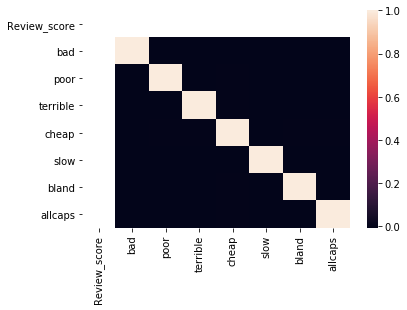

In [6]:
sns.heatmap(df.corr()) # What do you do if word do not show independece? Create dictionary of count of words

In [7]:
#print(df['gross'].value_counts()) # None of the reviews use the word gross - use this line for other keywords
print(df['bad'].value_counts())

False    991
True       9
Name: bad, dtype: int64


In [8]:
#This dataset has two possible outcomes - is positve or is negative and thus it is Binomial or Benoulli
data = df[keywords + ['allcaps']]
target =df['Review_score']

In [9]:
#Create two dataframe to test model performance using subset of data

dftest = df[0:50]
dftest2 = df[50:100]

In [10]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(data,target)
y_pred = bnb.predict(data)
print('Number of mislabeled points out of a total {} points : {}'.format
     (data.shape[0],
     (target!=y_pred).sum()
     ))
#What does error message mean? 

Number of mislabeled points out of a total 1000 points : 0


c:\users\etusk\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -


In [11]:
data['PredRes']=y_pred # Adds the prediction back into the df


c:\users\etusk\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
#use different data set to train or take a subset of data you currently have to evaluate performance
data2 = dftest[keywords + ['allcaps']] # Running the model again 
target2 =dftest['Review_score']
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(data2,target2)
y_pred = bnb.predict(data2)
print('Number of mislabeled points out of a total {} points : {}'.format
     (data.shape[0],
     (target2!=y_pred).sum()
     ))

Number of mislabeled points out of a total 1000 points : 0


c:\users\etusk\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -


In [36]:
#df.drop(['bad', 'poor', 'terrible', 'cheap','slow','bland','allcaps'], axis=1, inplace=True)
#df.columns = ['reviews','positive'] #Why do my key words become columns? 
#df['clean_review'] = df['reviews'].str.lower()
#df['positive'] = (df['positive'] == 1)

print(df.head())

                                             reviews  positive  \
0                           Wow... Loved this place.     False   
1                                 Crust is not good.     False   
2          Not tasty and the texture was just nasty.     False   
3  Stopped by during the late May bank holiday of...     False   
4  The selection on the menu was great and so wer...     False   

                                        clean_review  
0                           wow... loved this place.  
1                                 crust is not good.  
2          not tasty and the texture was just nasty.  
3  stopped by during the late may bank holiday of...  
4  the selection on the menu was great and so wer...  


In [39]:
#Iterate on the classfier by choosing different key wordlists, hold out groups, cross validation, and other models 

# Lets take a look at the data now and see if I can find any words to use for the keywords. 
#print(df.head(50))

reviews_pos = df.query('reviews == 1')
reviews_neg = df.query('reviews == 0')

# Finding more inspiration.
reviews_pos[1:20] # Is there nothing to query here?

,reviews,positive,clean_review


In [40]:
#Holdout Groups
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 1.0
Testing on Sample: 1.0


c:\users\etusk\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
c:\users\etusk\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -


In [41]:
#Cross Validation

from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

c:\users\etusk\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
c:\users\etusk\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
c:\users\etusk\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
c:\users\etusk\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
c:\users\etusk\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_lo

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])